<a href="https://colab.research.google.com/github/RaymondUW2023/NN-Group-Project-Team-14/blob/main/PCA_of_Cifar_10_And_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Examples of PCA and KNN followed from Tensorflow website.

In [16]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

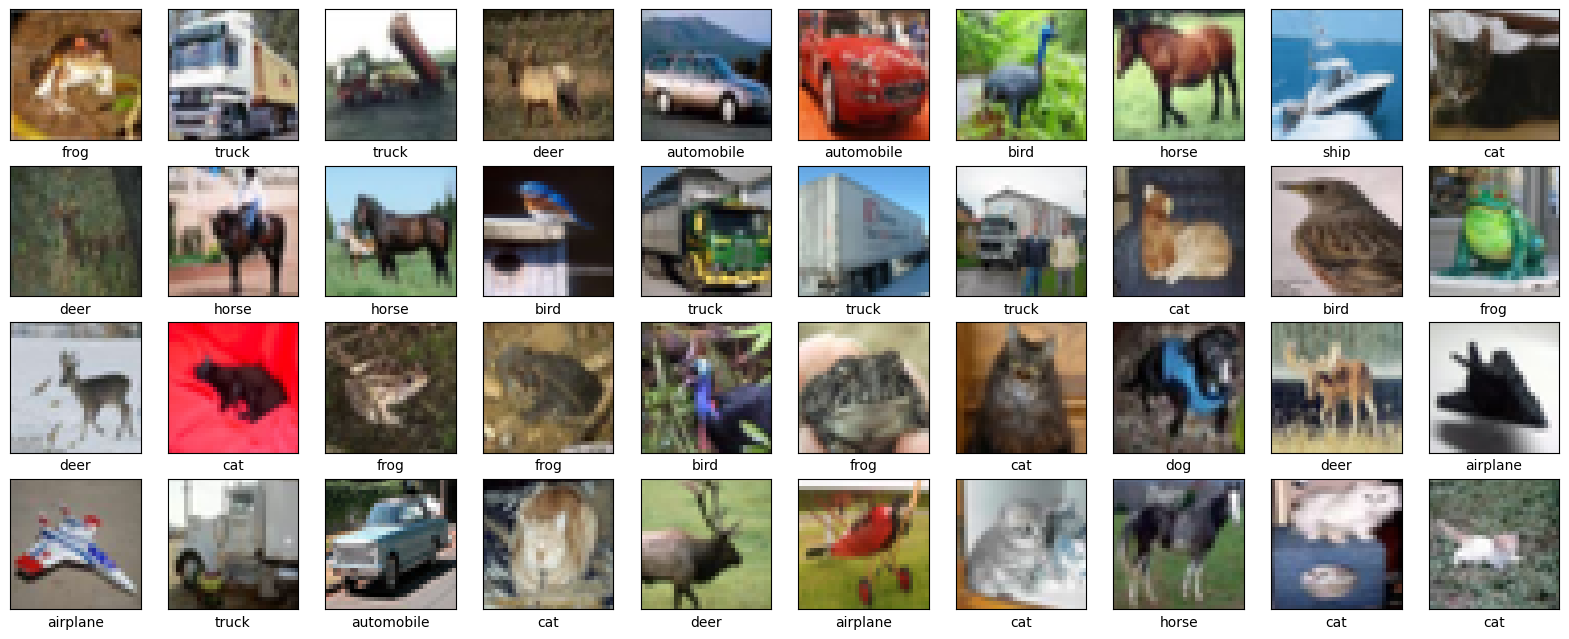

In [17]:
# Visualizing the Data

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(20,20))
for i in range(40):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [18]:
x_train = train_images.reshape((50000,3072))
x_test = test_images.reshape((10000,3072))
y_train = train_labels.reshape(50000,)
y_test = test_labels.reshape(10000,)
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((50000, 3072), (10000, 3072), (50000,), (10000,))

Applying PCA

In [19]:
import sklearn
from sklearn.decomposition import PCA

In [20]:
PCA_Components = 2
pca = PCA(n_components=PCA_Components)
x_train_transformed = pca.fit_transform(x_train)
x_test_transformed = pca.transform(x_test)
x_train_transformed.shape, x_test_transformed.shape

((50000, 2), (10000, 2))

Building the KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
# Model building:  KNN classifier
knn = KNeighborsClassifier(n_neighbors=330).fit(x_train_transformed, y_train)
y_pred = knn.predict(x_test_transformed)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [24]:
# Performance evaluation
print("P(classification) =", np.round(accuracy_score(y_test, y_pred), 5))
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))

P(classification) = 0.2144
Confusion matrix: 
 [[387  43 117  11  25  63  64  23 151 116]
 [ 88 116  96  18  51  70 197  19 148 197]
 [189  59 203  28  80  91 207  25  64  54]
 [126  65 123  54 121 148 205  29  57  72]
 [ 67  54 166  42 125 166 230  36  49  65]
 [126  47 144  54 117 207 165  36  56  48]
 [101  60 153  35  94 114 332  20  41  50]
 [107  63 125  54  66 162 113  34 134 142]
 [ 80  54  76  22  40  58  55  23 344 248]
 [ 97  91  80  10  39  33  67  15 226 342]]


Optimization of PCA with KNN

In [30]:
# Model building:  KNN classifier
# Testing the Range 25:41 based on the paper
accuacy_index_for_KNN = tf.zeros((50+3)*43).numpy()
accuacy_index_for_KNN_for_graph = tf.zeros([43,50+3]).numpy()
print(accuacy_index_for_KNN.shape)
temp = 0;
indx_counter = 0;
# Loop to find the best number of nearest neighbors
temp = 0;
for i in range(23,39):
  k = i+2
  print(k)
  pca = PCA(n_components=k)
  x_train_transformed = pca.fit_transform(x_train)
  x_test_transformed = pca.transform(x_test)
  for j in range(50):
    indx_counter=indx_counter+1;
    knn = KNeighborsClassifier(n_neighbors=j+1).fit(x_train_transformed, y_train)
    y_pred = knn.predict(x_test_transformed)
    accuacy_index_for_KNN[indx_counter] = accuracy_score(y_test, y_pred)
    accuacy_index_for_KNN_for_graph[k,j+1] = accuracy_score(y_test, y_pred)
    if temp < np.round(accuracy_score(y_test, y_pred), 5):
      temp = np.round(accuracy_score(y_test, y_pred), 5)
      bestn_neighbors = j+1
      best_PCA = i+2

(2279,)
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


In [26]:
import numpy as np
import pandas as pd
from google.colab import drive

In [31]:
# Mount Google Drive
drive.mount('/content/drive')

# Save the array to a CSV file
csv_filename = '/content/drive/MyDrive/my_KNN_data.csv'
np.savetxt(csv_filename, accuacy_index_for_KNN_for_graph, delimiter=',')

# Optional: Load the CSV file back into a variable
#loaded_array = np.loadtxt(csv_filename, delimiter=',')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


33
16


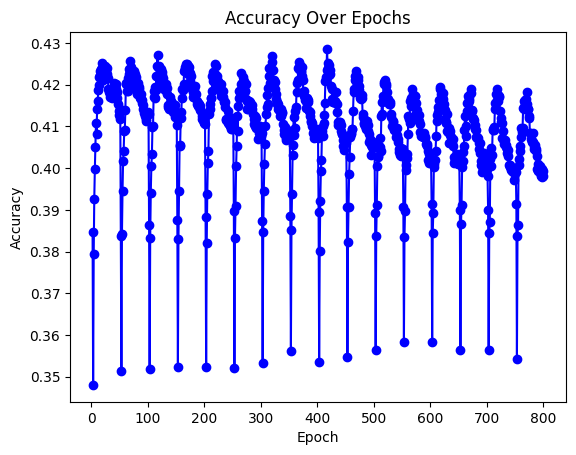

In [36]:
print(best_PCA)
print(bestn_neighbors)
# Plot the vector
plt.plot(np.arange(1, len(accuacy_index_for_KNN)+1)[1:800], accuacy_index_for_KNN[1:800], marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')

# Show the plot
plt.show()

In [ ]:
#Best PCA 33 with K = 16

In [29]:
# Performance evaluation
print(bestk+1)
print("P(classification) =", np.round(accuracy_score(y_test, y_pred), 5))
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))


NameError: ignored

Visualize the Results

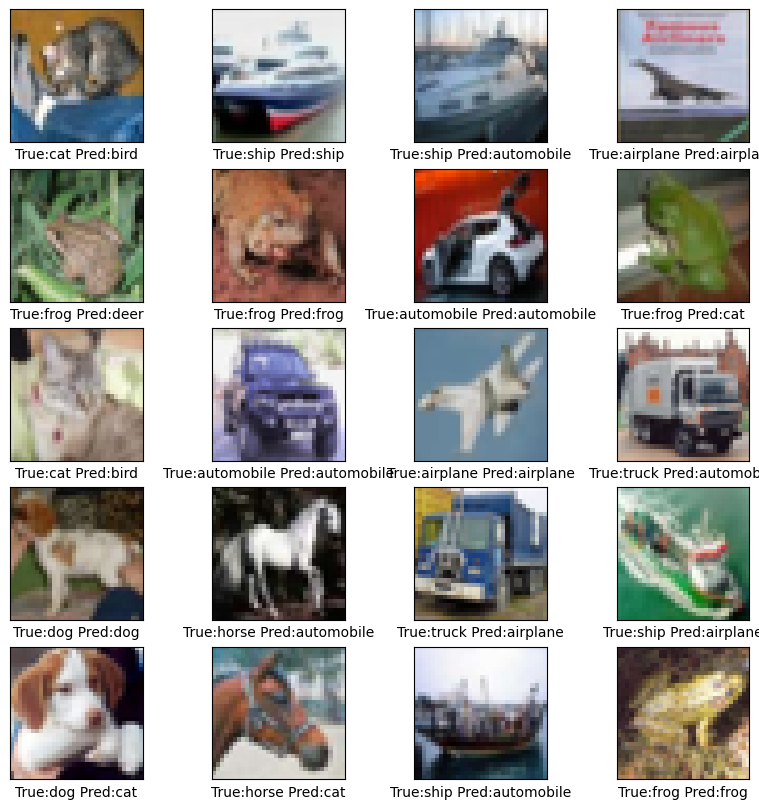

In [ ]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.xlabel('True:'+class_names[test_labels[i][0]]+' '+'Pred:'+class_names[y_pred[i]])
plt.show()
